# Tarea 2 - Regresion Polinomial & Feature engineering

### <font color=blue> Parte 1 - Modelo exponencial de covid-19 usando feature-eng

Usando el ejemplo de covid-19 en el notebook de feature-eng (https://colab.research.google.com/drive/1sJV2HG7tQgCGKES3-dIclzHQJ9qAWB3b?usp=sharing) crear un modelo de covid-19 para Guatemala.

* Convertir la fecha a un entero "número de día", por ejemplo si se usan datos desde el 22 de abril, este es el día 0, el 23 es el día 1.
* Aplicar regresión lineal sobre la variable "Confirmed" transformada.
* Una vez entrenado el modelo usarlo para aproximar la cantidad de casos confirmados para el 30 de mayo. Se debe reportar la cantidad de casos, no la cantidad transformada obtenida.

In [1]:
import numpy as np
import pandas as pd
import math as mt
from matplotlib import pyplot as plt
from scipy.stats import norm
from sklearn.linear_model import LinearRegression

In [49]:
Covid_Data = pd.read_csv('covid_19_clean_complete.csv')

In [50]:
Covid_Data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0
...,...,...,...,...,...,...,...,...
29035,NaN,Western Sahara,24.215500,-12.885800,5/10/20,6,0,5
29036,NaN,Sao Tome and Principe,0.186360,6.613081,5/10/20,208,5,4
29037,NaN,Yemen,15.552727,48.516388,5/10/20,51,8,1
29038,NaN,Comoros,-11.645500,43.333300,5/10/20,11,1,0


In [51]:
Covid_DataG = Covid_Data[Covid_Data['Country/Region']== 'Guatemala'].sort_values('Date').copy()
Covid_DataG['Date_Number'] = range(0, len(Covid_DataG))
Covid_DataG

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Date_Number
123,NaN,Guatemala,15.7835,-90.2308,1/22/20,0,0,0,0
387,NaN,Guatemala,15.7835,-90.2308,1/23/20,0,0,0,1
651,NaN,Guatemala,15.7835,-90.2308,1/24/20,0,0,0,2
915,NaN,Guatemala,15.7835,-90.2308,1/25/20,0,0,0,3
1179,NaN,Guatemala,15.7835,-90.2308,1/26/20,0,0,0,4
...,...,...,...,...,...,...,...,...,...
27579,NaN,Guatemala,15.7835,-90.2308,5/5/20,763,19,79,105
27843,NaN,Guatemala,15.7835,-90.2308,5/6/20,798,21,86,106
28107,NaN,Guatemala,15.7835,-90.2308,5/7/20,832,23,90,107
28371,NaN,Guatemala,15.7835,-90.2308,5/8/20,900,24,101,108


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Date', ylabel='Confirmed'>

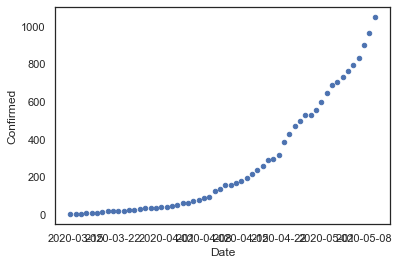

In [52]:
Covid_DataG["Date"] = pd.to_datetime(Covid_DataG["Date"],infer_datetime_format = True)
GT_confirmed = Covid_DataG[(Covid_DataG["Confirmed"] > 0)].copy()
GT_confirmed.plot.scatter(x = "Date",y="Confirmed")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Date_Number', ylabel='ln(confirmed)'>

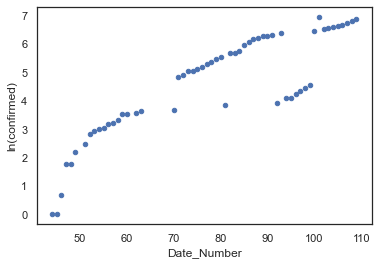

In [53]:
GT_confirmed["ln(confirmed)"] = np.log(GT_confirmed["Confirmed"])
GT_confirmed.plot.scatter(x = "Date_Number",y="ln(confirmed)")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Date_Number', ylabel='ln(confirmed)'>

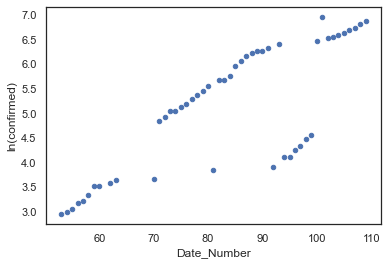

In [54]:
GT_confirmed_post24 = GT_confirmed[GT_confirmed.Date >= '2020-03-22']
GT_confirmed_post24.plot.scatter(x = "Date_Number",y="ln(confirmed)")

In [55]:
X = GT_confirmed_post24['Date_Number'].values.reshape((-1, 1))
Y = GT_confirmed_post24['ln(confirmed)'].values

model = LinearRegression().fit(X, Y)
r_sq = model.score(X, Y)
print('Coeficiente Determinacion:', r_sq)


Coeficiente Determinacion: 0.609029284500213


In [56]:
print('Intercepto:', model.intercept_)
print('B1:', model.coef_)

Intercepto: 0.15673977235539827
B1: [0.05961248]


In [57]:
x_Mayo30 = np.array([130]).reshape((-1, 1))
y_new = model.predict(x_Mayo30)
Y_Mayo30 = mt.exp(y_new[0])
Y_Mayo30

2714.496679422182

**Resultado** El numero de casos que se pueden predecir para el 30 de mayo dado la regresion lineal son 2714 aproximadamete

### <font color=blue>Parte 2 - Modelo polinomial de calidad de vinos

Es permitido utilizar [sklearn.preprocessing.polynomialfeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)


### Instrucciones

1. Seleccionar y transformar(generando las combinaciones polinomiales para un polinomio de grado dos o tres a elección) las features que considere que son las mejores para predecir la calidad del vino, utilizar como minimo 2 features. Para seleccionar las features, hacer un analisis exploratorio por ejemplo(pero no limitado a ):  graficando y viendo la forma en que se comportan los datos.

 Por ejemplo, se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
 
 $[a,b,a^{2},b^{2},ab]$
 
 No olvidar el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columnas:
 
 $[1,a,b,a^{2},b^{2},ab]$
2. Una vez transformada la data aplicar regresion lineal con las features polinomiales usando Tensorflow.

Requisitos adicionales:
* Se debe agregar al notebook un screenshot del grafo de tensorboard, simplificando(usando  names , y name_scope como visto en clase).

* Se debe generar un directorio de logs de tensorboard para cada corrida/experimento , con cada directorio identificando facilmente la configuración del experimento como visto en clase, por ejemplo para un experimento con learning rate = 0.1 , y polinomio grado 2  crear un directorio: lr=0.1_polinomio_grado=2. (Agregar al notebook un screenshot de estas gráficas)

* Concluir en markdown cual es el mejor modelo para este caso basado en la comparativa entre curvas de costo/error en tensorboard.

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import seaborn as sns
import tensorflow as tf
import datetime, os

In [3]:
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  print("Enabled compatitility to tf1.x")

Instructions for updating:
non-resource variables are not supported in the long term
Enabled compatitility to tf1.x


In [4]:
Vino_Data = pd.read_csv('winequality-red.csv')
Vino_Data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
#SPLIT DE DATOS
X_Train, X_Test, Y_Train, Y_Test = train_test_split(Vino_Data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10]], Vino_Data.iloc[:,[11]], test_size=0.2)

### Red Wine Quality Data

Se aplicará regresión para crear un modelo de la calidad de vino en función de características del mismo, siendo 1 el peor vino y 10 el mejor.

Variables de entrada:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Varaible a predecir: 
12. quality (puntuacion  entre 0 y 10) 



In [6]:
AnalisisExploratorio = np.array([0,0,0,0,0,0])
for i in range(X_Train.shape[1]):
    VarMedia = np.mean(X_Train.iloc[:,i])
    VarMax = np.max(X_Train.iloc[:,i])
    VarMin = np.min(X_Train.iloc[:,i])
    VarPeak = np.ptp(X_Train.iloc[:,i])
    VarDesv = np.std(X_Train.iloc[:,i])
    
    info = np.array([VarMedia,VarMax,VarMin,VarPeak,VarDesv,i+1])
    AnalisisExploratorio = np.vstack((AnalisisExploratorio, info))
    
AnalisisExploratorio_dataframe = pd.DataFrame(AnalisisExploratorio[1:],columns=['Media','Max', 'Min', 'Rango', 'Desviacion Estandar', 'Variable'])
AnalisisExploratorio_dataframe

,Media,Max,Min,Rango,Desviacion Estandar,Variable
0,8.330962,15.60000,4.60000,11.00000,1.753476,1.0
1,0.529797,1.33000,0.12000,1.21000,0.180644,2.0
2,0.270430,0.79000,0.00000,0.79000,0.195013,3.0
3,2.530258,15.50000,0.90000,14.60000,1.412884,4.0
4,0.086359,0.61100,0.01200,0.59900,0.043771,5.0
5,15.930414,72.00000,1.00000,71.00000,10.686623,6.0
6,46.650508,289.00000,6.00000,283.00000,33.584388,7.0
7,0.996723,1.00369,0.99007,0.01362,0.001917,8.0
8,3.310055,4.01000,2.86000,1.15000,0.154733,9.0
9,0.656826,1.98000,0.37000,1.61000,0.165076,10.0


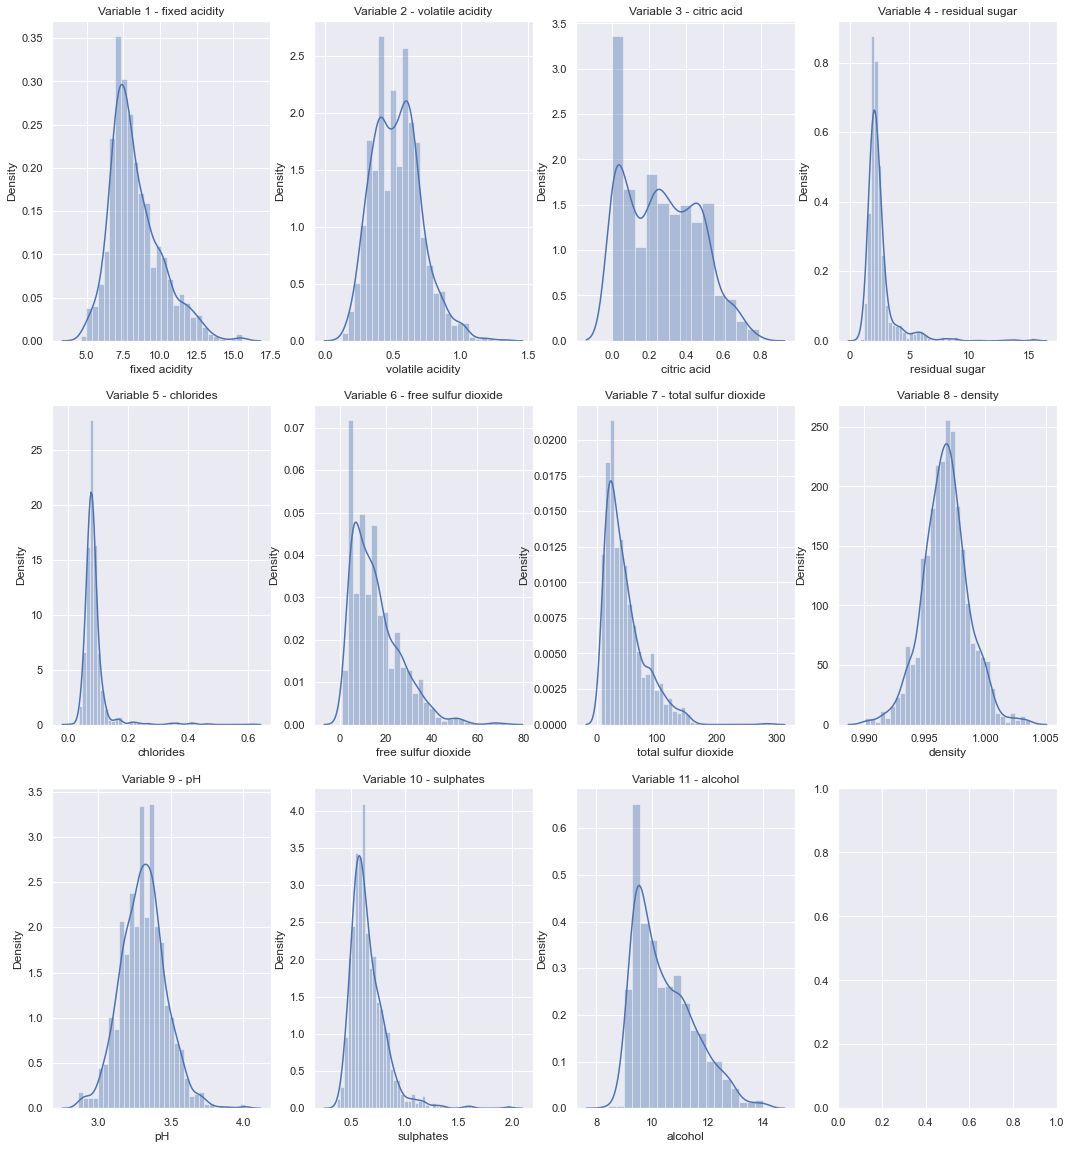

In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_theme();
fig, eje = plt.subplots(3, 4,figsize=(18, 20))

eje[0,0].set_title('Variable 1 - fixed acidity')
sns.distplot(X_Train.iloc[:,0],ax=eje[0,0]) 

eje[0,1].set_title('Variable 2 - volatile acidity')
sns.distplot(X_Train.iloc[:,1],ax=eje[0,1])

eje[0,2].set_title('Variable 3 - citric acid')
sns.distplot(X_Train.iloc[:,2],ax=eje[0,2])

eje[0,3].set_title('Variable 4 - residual sugar')
sns.distplot(X_Train.iloc[:,3],ax=eje[0,3])

eje[1,0].set_title('Variable 5 - chlorides')
sns.distplot(X_Train.iloc[:,4],ax=eje[1,0])

eje[1,1].set_title('Variable 6 - free sulfur dioxide')
sns.distplot(X_Train.iloc[:,5],ax=eje[1,1])

eje[1,2].set_title('Variable 7 - total sulfur dioxide')
sns.distplot(X_Train.iloc[:,6],ax=eje[1,2])

eje[1,3].set_title('Variable 8 - density')
sns.distplot(X_Train.iloc[:,7],ax=eje[1,3])

eje[2,0].set_title('Variable 9 - pH')
sns.distplot(X_Train.iloc[:,8],ax=eje[2,0])

eje[2,1].set_title('Variable 10 - sulphates')
sns.distplot(X_Train.iloc[:,9],ax=eje[2,1])

eje[2,2].set_title('Variable 11 - alcohol')
sns.distplot(X_Train.iloc[:,10],ax=eje[2,2])

plt.show()

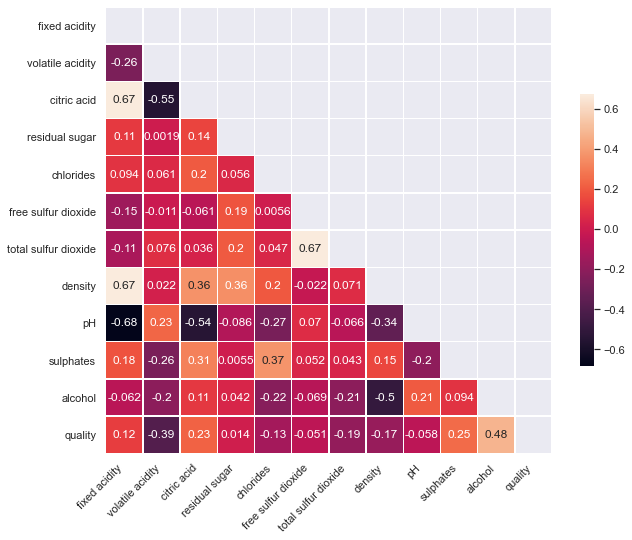

In [8]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))

sns.set_theme(style="white")
corr = Vino_Data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(4, 20, as_cmap=True)
sns.heatmap(corr,square=True,linewidths=.5, cbar_kws={"shrink": .5},annot=True,ax=ax,mask=mask)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right');

In [11]:
#CARGA DE TENSORBOARD
%load_ext tensorboard
logs_base_dir = "./logs"
os.makedirs(logs_base_dir, exist_ok=True)

In [13]:
#Hyper-Parametros
lr = 0.0001
bs = 500
ep = 500

In [35]:
class ModeloLinealMul:
  def __init__(self,n):
    tf.reset_default_graph()
    self.parametros = tf.get_variable("Parametros",dtype=tf.float64,shape=[n,1],initializer=tf.zeros_initializer())
    self.error = tf.get_variable("Error",dtype=tf.float64,shape=[1],initializer=tf.zeros_initializer())
    
  def __call__(self,x): 
    #x = tf.concat([x,tf.ones_like(s,name="X_Vector_1")], axis=1,name="X_Addicion_1")  
    return tf.linalg.matmul(x,self.parametros,name="Prediccion")

  def actualizar(self,x,y,learning_rate):
    prediccion = self(x)
    error = 1/2 * tf.math.reduce_mean(tf.math.square(y - prediccion,name="Error_Cuadrado"),axis=0,name="Error_Media") 
    gradiente = tf.gradients(error,self.parametros, name="Gradiente")  
    actualizacion_error = tf.assign(self.error, error)
    actualizacion_parametros = tf.assign(self.parametros,self.parametros - tf.multiply(gradiente,learning_rate)[0],name="Actualizacion_Parametros")

    return actualizacion_parametros,actualizacion_error

In [36]:
def ModeloRegresionLineal(X,Y,learning_rate,batch_size,epochs):  
    m, n = X.shape  # tamaño_muestra, #_features
    modelo = ModeloLinealMul(n)
    total_iteraciones =  int(m/batch_size)

    #Definicion Tensores
    tensor_x = tf.placeholder(tf.float64,[None,n],"tensor_x")
    tensor_y = tf.placeholder(tf.float64,[None,1],"tensor_y")

    #Definicion Modelo
    prediccion = modelo(tensor_x)
    actualizacion_parametros = modelo.actualizar(tensor_x,tensor_y,learning_rate)

    with tf.train.MonitoredSession() as session:
        #Tensorboard Grafo
        tf.reset_default_graph()   
        log_dir = "logs/E_Multivariable/"+"BS-"+str(batch_size)+"_"+"LR-"+str(learning_rate)+"_Polinomio-"+str(n-1)+"_"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
        Grafo = tf.summary.FileWriter(log_dir, session.graph)


        for epoch in range(epochs):    
            for i in range(total_iteraciones):          
                muestra_inicio = i*batch_size
                muestra_fin = muestra_inicio + batch_size

                x_parametros =  np.array(X[muestra_inicio:muestra_fin])
                y_parametros = np.array(Y[muestra_inicio:muestra_fin])
                feed_dict = {tensor_x:x_parametros, tensor_y:y_parametros}
                _,parametros,e = session.run([actualizacion_parametros,modelo.parametros,modelo.error],feed_dict=feed_dict)  
                #if epoch % 100 == 0:
                #    print("Epoch {} iteracion {} parametros={} e={}".format(epoch,i,parametros,e))

                #Tensorboard Escalar
                summary = tf.Summary(value=[tf.Summary.Value(tag="Error", simple_value=e[0])])
                Grafo.add_summary(summary, epoch)

            feed_dict = {tensor_x:X, tensor_y:Y}

        PendienteInter_final = session.run([modelo.parametros],feed_dict=feed_dict)
        Grafo.close()

    print("Analisis Finalizado")

**Polinomio Grado 2 - LR = 0.0001 EP= 500 DS=Variable (10, 100,500)**  

In [37]:
X_VinoData = X_Train.iloc[:,[9,10]]
Y_VinoData = Y_Train

poly = PolynomialFeatures(2)
x_FeaturesPol = poly.fit_transform(X_VinoData)
x_FeaturesPol

X = x_FeaturesPol[:,[0,3,5]]
Y = Y_VinoData.to_numpy().reshape([-1,1])

In [38]:
ModeloRegresionLineal(X,Y,0.0001,10,500)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Analisis Finalizado


In [39]:
ModeloRegresionLineal(X,Y,0.0001,100,500)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Analisis Finalizado


In [40]:
ModeloRegresionLineal(X,Y,0.0001,500,500)  #***

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Analisis Finalizado


**TENSORBOARD**

In [18]:
%tensorboard --logdir logs/E_Multivariable

Reusing TensorBoard on port 6006 (pid 7692), started 0:01:02 ago. (Use '!kill 7692' to kill it.)

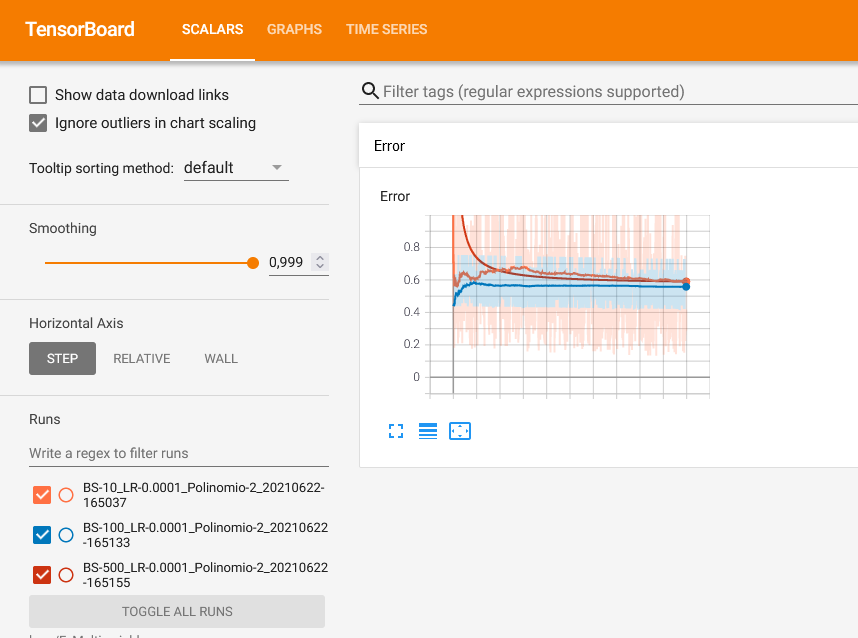